In [1]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

In [4]:
# Intenta leer el archivo CSV utilizando una codificación diferente, por ejemplo, 'latin1'
data = pd.read_csv('D:/ejercios/ejercio1/unidad-5/wineV2.csv')
data.head()

,clase,alcohol,acido_metalico,Ceniza,alcalinidad_de_la ceniza,magnesio,fenoles_totales,flavonoides,fenoles_no_flavonoides,proantocianidinas,intensidad_de_color,tono,OD280_OD315_de_vinos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Manejo de datos desbalanceados (ejemplo de sobremuestreo de la clase minoritaria)
class_1 = data[data['clase'] == 1]
class_2 = data[data['clase'] == 2]
class_3 = data[data['clase'] == 3]

In [6]:
class_2_upsampled = resample(class_2, replace=True, n_samples=len(class_1), random_state=42)
class_3_upsampled = resample(class_3, replace=True, n_samples=len(class_1), random_state=42)


In [7]:
data_upsampled = pd.concat([class_1, class_2_upsampled, class_3_upsampled])

In [10]:
# Definir las columnas de predictores y objetivo
predictors_col = ["alcohol", "acido_metalico", "Ceniza", "alcalinidad_de_la ceniza", "magnesio", "fenoles_totales", "flavonoides", "fenoles_no_flavonoides", "proantocianidinas", "intensidad_de_color", "tono", "OD280_OD315_de_vinos_diluidos", "prolina"]
target_col = ['clase']

# Resto del código...

# Normalización de datos
data_upsampled[predictors_col] = (data_upsampled[predictors_col] - data_upsampled[predictors_col].mean()) / data_upsampled[predictors_col].std()

In [11]:
predictors = data_upsampled[predictors_col]
target = data_upsampled[target_col]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [13]:
# Ajuste de hiperparámetros (ajusta según sea necesario)
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=5, random_state=13)

In [14]:
arbol = tree.fit(X_train, y_train)

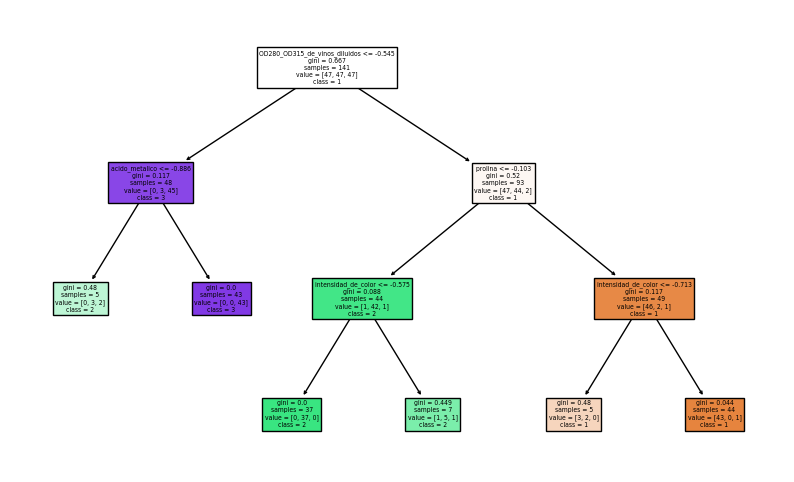

In [15]:
# Visualización del árbol
plt.figure(figsize=(10, 6))
plot_tree(arbol, filled=True, feature_names=predictors_col, class_names=['1', '2', '3'])
plt.show()

In [16]:
# Predicciones
predicciones = arbol.predict(X_test)

In [17]:
# Examinamos la matriz de confusión
conf_matrix = confusion_matrix(np.array([y[0] for y in y_test.values.tolist()]), predicciones)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[12  0  0]
 [ 0 12  0]
 [ 0  1 11]]


In [18]:
# Métricas de clasificación
print("\nReporte de Clasificación:")
print(classification_report(np.array([y[0] for y in y_test.values.tolist()]), predicciones))


Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.92      1.00      0.96        12
           3       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [19]:
# Accuracy
accuracy = accuracy_score(y_test, predicciones)
print("\nAccuracy:", accuracy)


Accuracy: 0.9722222222222222


In [ ]:
# codigo reutilizado de la etapa-1